<a href="https://colab.research.google.com/github/MittalNeha/similar_faces/blob/main/CelebA_faceSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MCNN model
This is the implementation of the paper "Attributes for Improved Attributes: A
Multi-Task Network for Attribute Classification" -
Emily M. Hand and Rama Chellappa


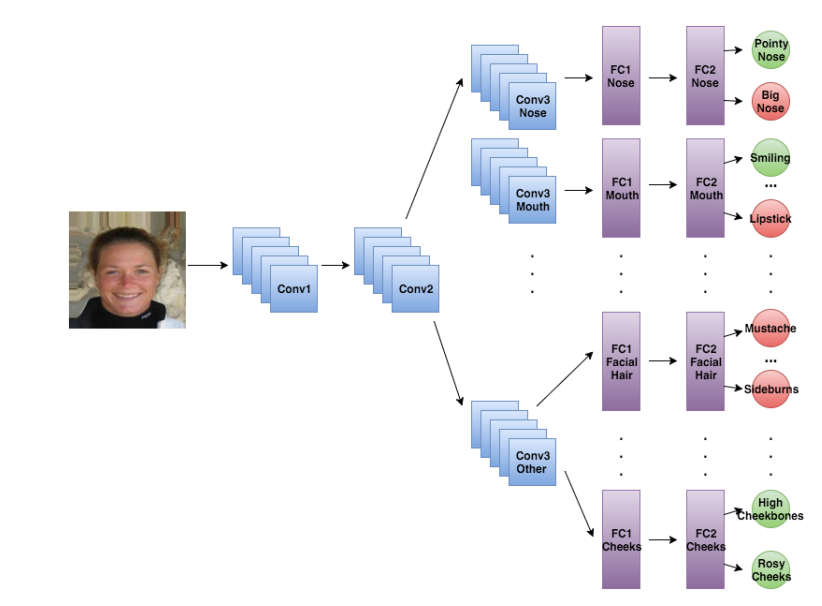


In [ ]:
# !git clone https://github.com/MittalNeha/similar_faces.git

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

import matplotlib.pyplot as plt

In [ ]:
import similar_faces
from similar_faces import *
# from similar_faces import main
# from similar_faces.dataset import FaceAttributesDataset

# from similar_faces.main import attributes_model

# from similar_faces import dataset
from similar_faces.similar_faces import FaceSimilarity

batch_size is {} 16


In [ ]:
use_cuda = 1
device = torch.device("cuda" if use_cuda else "cpu")

## Get the dataset from Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q /content/celeba-dataset.zip

#Analyse the datset

In [ ]:
#Folder and image files
from similar_faces.dataset import FaceAttributesDataset

from similar_faces.main import attributes_model

from similar_faces import dataset
baseFolder = '/content/'
imgFolder = 'img_align_celeba/img_align_celeba'

visual_dataset = FaceAttributesDataset(baseFolder, imgFolder, 'list_attr_celeba.csv')

In [ ]:
data = next(iter(visual_dataset))
print(data['image'])
print(data['attr'])

<PIL.Image.Image image mode=RGB size=227x227 at 0x7BF42D3FAC50>
{'gender': [0.0], 'nose': [0.0, 1.0], 'mouth': [0.0, 1.0, 1.0, 1.0], 'eyes': [1.0, 0.0, 0.0, 0.0, 0.0], 'face': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0], 'head': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'facial_hair': [0.0, 0.0, 1.0, 0.0, 0.0], 'cheeks': [1.0, 0.0], 'fat': [0.0, 0.0]}


Plot sample images from CelebA dataset

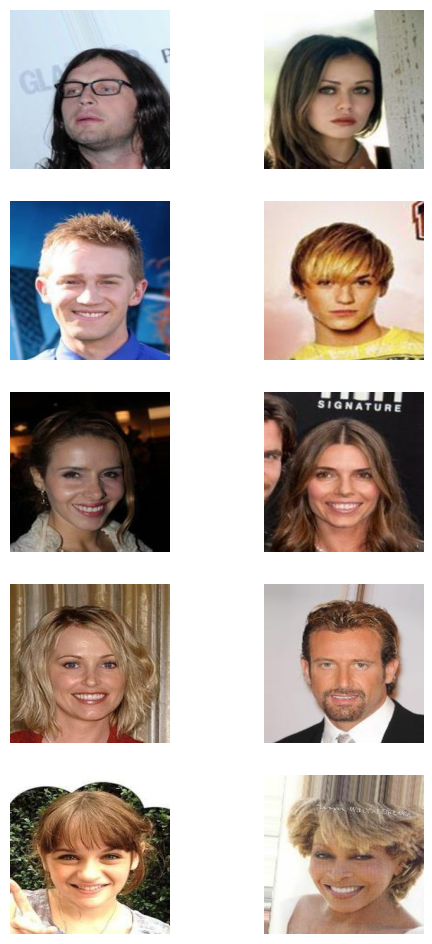

In [ ]:
figure = plt.figure(figsize=(6, 12))
rows, cols = 5,2
inc = 100
for idx in range(1, cols * rows + 1):
    sample = visual_dataset[idx+inc]
    figure.add_subplot(rows,cols,idx)
    plt.imshow(sample['image'])
    plt.axis("off")
plt.show()

#Finding similar Faces

Train the MCNN model

In [ ]:
net, hist = attributes_model()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/content/similar_faces/main.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_loss = torch.tensor(loss, requires_grad=True)  # sourceTensor.clone().detach().requires_grad_(True)


1: loss 6.33914041519165, acc 24.443552017211914
101: loss 6.415730953216553, acc 25.47987937927246
201: loss 6.375748157501221, acc 24.198719024658203
301: loss 6.378084182739258, acc 25.51192855834961
401: loss 6.427488327026367, acc 24.334936141967773
501: loss 6.443472385406494, acc 24.439992904663086
601: loss 6.367058277130127, acc 25.75409507751465
701: loss 6.404841423034668, acc 24.403491973876953
801: loss 6.441001892089844, acc 25.6312313079834
901: loss 6.424541473388672, acc 27.19106101989746
1001: loss 6.342662334442139, acc 22.697649002075195
1101: loss 6.392529010772705, acc 28.015491485595703
1201: loss 6.355694770812988, acc 29.55751609802246


Initialize the class for Face similarity

In [ ]:
fs = FaceSimilarity(dataset.allAttributes)
print("Trained a w2v model of {} vector_size".format(fs.model.wv.vector_size))

Created a Word2Vec model
Train NearestNeighbors
Trained a w2v model of 100 vector_size


Load a test image and find 5 most similar images from the trainset

{'gender': tensor([[0.6171]], device='cuda:0', grad_fn=<SigmoidBackward0>), 'nose': tensor([[0.5090, 0.5000]], device='cuda:0', grad_fn=<SigmoidBackward0>), 'mouth': tensor([[0.5000, 0.5549, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward0>), 'eyes': tensor([[0.5262, 0.5000, 0.5000, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward0>), 'face': tensor([[0.5250, 0.5000, 0.5256, 0.5000, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward0>), 'head': tensor([[0.5000, 0.5305, 0.5000, 0.5000, 0.5000, 0.5026, 0.5000, 0.5110, 0.5000,
         0.5000, 0.5000, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward0>), 'facial_hair': tensor([[0.5000, 0.5000, 0.5111, 0.5000, 0.5000]], device='cuda:0',
       grad_fn=<SigmoidBackward0>), 'cheeks': tensor([[0.5000, 0.6335]], device='cuda:0', grad_fn=<SigmoidBackward0>), 'fat': tensor([[0.5000, 0.5398]], device='cuda:0', grad_fn=<SigmoidBackward0>)}
['Male', 'Smiling', 'Arched_Eyebrows', 

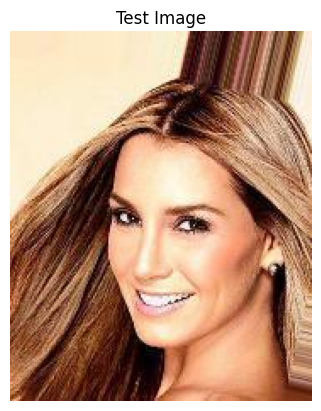

In [ ]:
img_name = 'img_align_celeba/img_align_celeba/000001.jpg' #images for testing
test_image = Image.open(img_name)
#Test image
plt.title("Test Image")
plt.axis("off")
plt.imshow(test_image)

transform = transforms.Compose([
    # other transformations to be added in this list
    transforms.ToTensor()
])

test_image = test_image.resize((227,227))
test_image = transform(test_image)

test_out = net(test_image.unsqueeze(0).to(device))
print(test_out)
sim_images = fs.similar_faces(test_out, dataset.groups, 5)

Plot the similar faces

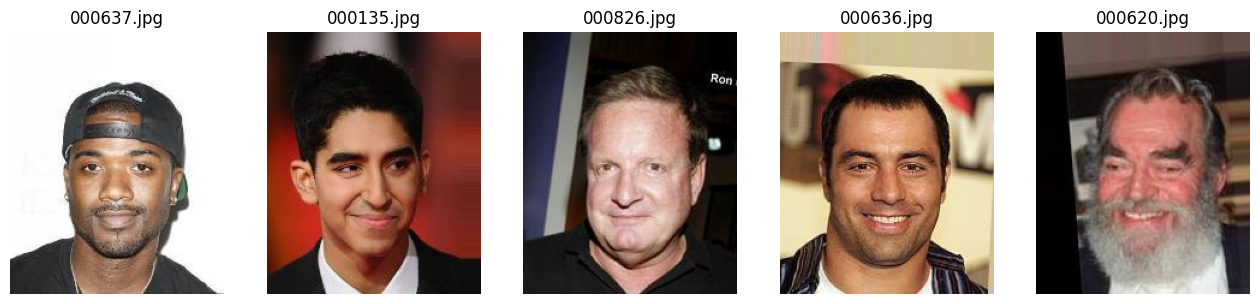

In [ ]:
figure = plt.figure(figsize=(16, 12))
rows, cols = 1, len(sim_images)
for idx in range(1, cols * rows+1):
    sample = Image.open('/content/img_align_celeba/img_align_celeba/' + sim_images[idx-1])
    figure.add_subplot(rows,cols,idx)
    plt.imshow(sample)
    plt.title(sim_images[idx-1])
    plt.axis("off")
plt.show()

In [ ]:
# # import importlib
# # importlib.reload(similar_faces.similar_faces)
# #ANVIL
# !pip install anvil-uplink
# import anvil.server
# anvil.server.connect('')

# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import glob
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2

# def get_image_with_bound(image, bound):
#   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#   center_x, center_y, width, height = bound
#   x_min, y_min = int(np.ceil(center_x - width / 2)), int(np.ceil(center_y - height / 2))
#   x_max, y_max = int(np.ceil(center_x + width / 2)), int(np.ceil(center_y + height / 2))

#    # Vẽ bounding box (màu xanh lá cây)
#   image_with_bbox = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

#   return image_with_bbox

# from tensorflow.keras.models import load_model

# model_local_trained = load_model('/content/drive/MyDrive/Data/model_trained/best_weight_ob_localization2.hdf5')
# model_class_trained = load_model('/content/drive/MyDrive/Data/model_trained/best_weight_EffNet_trans.hdf5')

# from tensorflow.keras.models import load_model
# import numpy as np

# class_names = ['Bún Bò Huế', 'Bánh Mì', 'Bánh Xèo', 'Bún Riêu', 'Cháo Lòng']

# from google.colab.patches import cv2_imshow
# import cv2
# import numpy as np
# def get_classification(img):
#   img = cv2.resize(img, (380,380))                                              # Shape 380*380*3
#   img = np.expand_dims(img, axis=0)
#   pred = model_class_trained.predict(img)
#   result = class_names[np.argmax(pred)]
#   return result

# def get_oj_localization(img):
#   img = cv2.resize(img, (380,380))                                              # Shape 380*380*3
#   img = np.expand_dims(img, axis=0)
#   bbox = model_local_trained.predict(img)
#   bbox = bbox[0]
#   real_bbox = [np.ceil(bbox[0]*380),
#                np.ceil(bbox[1]*380),
#                np.ceil(bbox[2]*380),
#                np.ceil(bbox[3]*380)]
#   image_with_bbox = get_image_with_bound(img[0], real_bbox)
#   return image_with_bbox

# import anvil.media
# import cv2
# import numpy as np
# from PIL import Image
# import base64

# @anvil.server.callable
# def predictions(file):
#   with anvil.media.TempFile(file) as f:
#     img = np.array(Image.open(f))

#   output_cls = get_classification(img)

#   image_with_bbox = get_oj_localization(img)
#   image_with_bbox = cv2.imencode('.jpg',  image_with_bbox)
#   b64_string = base64.b64encode(image_with_bbox[1]).decode('utf-8')

#   return output_cls, b64_string

# anvil.server.wait_forever()

In [ ]:
!pip freeze > requirements.txt

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:
# #ANVIL
# !pip install anvil-uplink
# import anvil.server
# anvil.server.connect('') # Replace '' with your Uplink key

# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import glob
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2
# from PIL import Image

# # ... (rest of the functions: get_image_with_bound, get_classification, get_oj_localization remain unchanged) ...

# import anvil.media
# import cv2
# import numpy as np
# from PIL import Image
# import base64

# @anvil.server.callable
# def predictions(file):
#   with anvil.media.TempFile(file) as f:
#     img = np.array(Image.open(f))

#   output_cls = get_classification(img)

#   image_with_bbox = get_oj_localization(img)
#   image_with_bbox = cv2.imencode('.jpg',  image_with_bbox)[1]  # Get encoded image data
#   b64_string = base64.b64encode(image_with_bbox).decode('utf-8')

#   return output_cls, b64_string

# # ... (rest of your code: test_image, transform, test_out, sim_images, figure, rows, cols remain unchanged) ...

# @anvil.server.callable
# def similar_faces_predictions(file):
#     with anvil.media.TempFile(file) as f:
#         img = Image.open(f)
#     img = img.resize((227,227))
#     img = transform(img)
#     test_out = net(img.unsqueeze(0).to(device))
#     sim_images = fs.similar_faces(test_out, dataset.groups, 5)  # Assuming fs and dataset are defined
#     return sim_images

# anvil.server.wait_forever()